# **Project title :- Zero-Shot Cross-Modal Retrieval Using CLIP**
# Submitted by :- Biswa pratap singh (236102105)
# Motivation:
I chose Zero-Shot Cross-Modal Retrieval using CLIP because it beautifully connects computer vision and natural language processing — two key pillars of AI. With CLIP, I can retrieve the correct image from a caption (or vice versa) without training anything, thanks to its zero-shot learning ability.

It scales well to open-ended, real-world tasks — for example:
Searching a huge image gallery with a custom sentence like “a man surfing at sunset.”
Detecting sensitive or harmful content using just a text prompt — no separate classifier needed.
Content filtering in platforms like Instagram, Pinterest, or AI art generators (e.g., DALLE, Midjourney) that rely on natural prompts.

So, I picked this topic not just for its technical elegance, but because it reflects how AI is evolving — from rigid, rule-based systems to general, flexible, and human-like understanding of multimodal data.
# Historical perspective:
Multimodal learning — the ability of machines to learn from and combine multiple data types like images, text, audio, or video — has seen significant progress over the last decade. Traditionally, early multimodal systems used feature-level fusion techniques, where visual features from CNNs (e.g., ResNet) and text features from models like LSTMs or word2vec were simply concatenated. These systems required task-specific architectures and manual supervision, which limited scalability and generalization.

The major shift came with the transformer revolution. Models like:

ViLBERT (2019) and VisualBERT (2019) introduced joint transformer-based architectures for vision and language.

UNITER, LXMERT, and Oscar extended this to image-caption matching and visual question answering, but still required fine-tuning for each task.

Then came CLIP (Contrastive Language–Image Pretraining, 2021 by OpenAI) — a paradigm shift. Instead of joint modeling or supervised training, CLIP used contrastive learning on 400M image-text pairs from the internet, aligning them in a shared embedding space. This allowed CLIP to perform zero-shot classification, retrieval, and filtering, breaking the dependence on large, manually labeled datasets.

Since CLIP, the field has further advanced with:

ALIGN (Google): A larger-scale CLIP-like model

BLIP/BLIP-2: Multimodal reasoning with caption generation

Flamingo (DeepMind) and GPT-4V: Multimodal LLMs capable of image-text dialogue

**My project** — cross-modal retrieval using CLIP — connects directly with this trajectory. It shows how far we've come: from needing dedicated, supervised models for each task, to having a single pretrained model that understands images and language together.
#Learnings from this work:
Working on Zero-Shot Cross-Modal Retrieval using CLIP gave me practical insight into how multimodal deep learning works — especially how vision and language can be connected in a shared semantic space using modern transformer-based models.

One of the key things I learned is how CLIP works internally:

It uses two separate encoders — a vision encoder (like ViT or ResNet) and a text encoder (based on a Transformer).

It learns to map both images and texts into the same embedding space using contrastive learning, so that related image-text pairs are close in that space.

This project helped me understand:

a) How to tokenize and preprocess images and texts for multimodal tasks

b) How cosine similarity between embeddings allows you to perform retrieval tasks — either:

c)From text to image (e.g., retrieve top-5 images for a given caption)

 Or from image to text (e.g., find the most matching captions for a selected image)

I implemented and tested:

a) A function to retrieve the top-5 images that are most similar to any custom or dataset caption.

b) A function to retrieve the top-5 captions that best describe a given image — even just by providing its index number in the dataset.

These methods showed me that CLIP is not just a classifier — it’s a flexible semantic matching engine. Even when the text was not exactly from the dataset (e.g., paraphrased captions or synonyms), CLIP still retrieved highly relevant images. This proved how powerful zero-shot and representation learning can be.

Additionally, I learned:

a) How to evaluate retrieval performance using Top-1 and Top-5 accuracy

b) How ranking is determined by similarity scores, and how small changes in query text can shift rankings significantly

c) How to visualize results and explain CLIP’s decisions effectively

Overall, this work deepened my understanding of modern multimodal systems and how they can be used in real-world applications like AI search engines, intelligent filtering, and prompt-based creative tools.



#Reflections:
**What surprised me in this work?**

One of the most surprising things I discovered while working on this project was how well CLIP performed even when the caption was not from the dataset. I could write a completely new sentence like “a person on horseback under the sunset”, and CLIP would still retrieve a highly relevant image — without any fine-tuning or training.

It also surprised me that:

The model understands semantic meaning, not just keywords. For example, “a man riding a horse” and “someone on a horse” retrieved almost the same results — showing CLIP’s strong representation learning.

Even if the dataset had visually similar images, CLIP could rank them sensibly, often bringing the most relevant one to the top.

When I gave vague or indirect prompts like “a brown animal in the field”, CLIP could still retrieve horse or dog images — proving it captures visual concepts, not just objects.

The shared embedding space worked so seamlessly: using cosine similarity alone, I could retrieve results across modalities with very little code.

Finally, the zero-shot power of CLIP — doing image classification, caption matching, and cross-modal retrieval without retraining — made me realize how advanced modern multimodal models have become compared to traditional, task-specific deep learning systems.

#Scope for the improvements
a) **Ground truth alignment**

In some cases, CLIP retrieves visually similar images that are not the actual ground-truth match from the dataset. A possible improvement would be to:Use better ranking algorithms (like k-NN over multiple captions per image)Incorporate caption clustering or consensus scoring from all 5 Flickr8k captions per image

b)**Multilingual Caption Support**

CLIP is primarily trained on English captions. If the input is in another language (e.g., Hindi or Odia), performance drops significantly. To improve:
Use multilingual CLIP variants (like M-CLIP)
Or apply a translation layer before embedding text

c)**Fine tuning on domain specific data**

CLIP is general-purpose. In domains like:
Medical imaging
Satellite photos
Technical illustrations
Its retrieval accuracy may fall due to lack of domain context. Fine-tuning CLIP on small domain-specific datasets could significantly improve performance.

d)**Explainability**

CLIP does not inherently explain why it retrieved an image. Improving interpretability (e.g., via attention heatmaps, Grad-CAM overlays) could help users understand model decisions better — especially in critical applications like security or medicine

e)**User Feedback Loop**

Allowing interactive feedback like “not relevant” or “more like this” would enable a simple relevance feedback loop and improve results over time (via re-ranking or soft prompting).

#References

**Research papers**

"Learning Transferable Visual Models From Natural Language Supervision" by Alec Radford et al. (2021)

https://arxiv.org/pdf/2103.00020

"Multilingual CLIP (M-CLIP)"

**Data sets**

Flickr8k Dataset for Image-caption pairs used for training and testing


  "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"

Flickr8k.token.txt ,Used to load 5 captions per image

https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip

**Tools used**

PyTorch - For model loading, tensor operations, and inference

Matplotlib - For image visualization, ranking grids, and graph plotting

TQDM - To monitor batch progress during feature extraction

Pillow (PIL) - For image preprocessing and conversion

Torch.nn.functional - Used specifically for cosine similarity calculations

Google Colab - Served as the development environment for coding, testing, and documenting the project





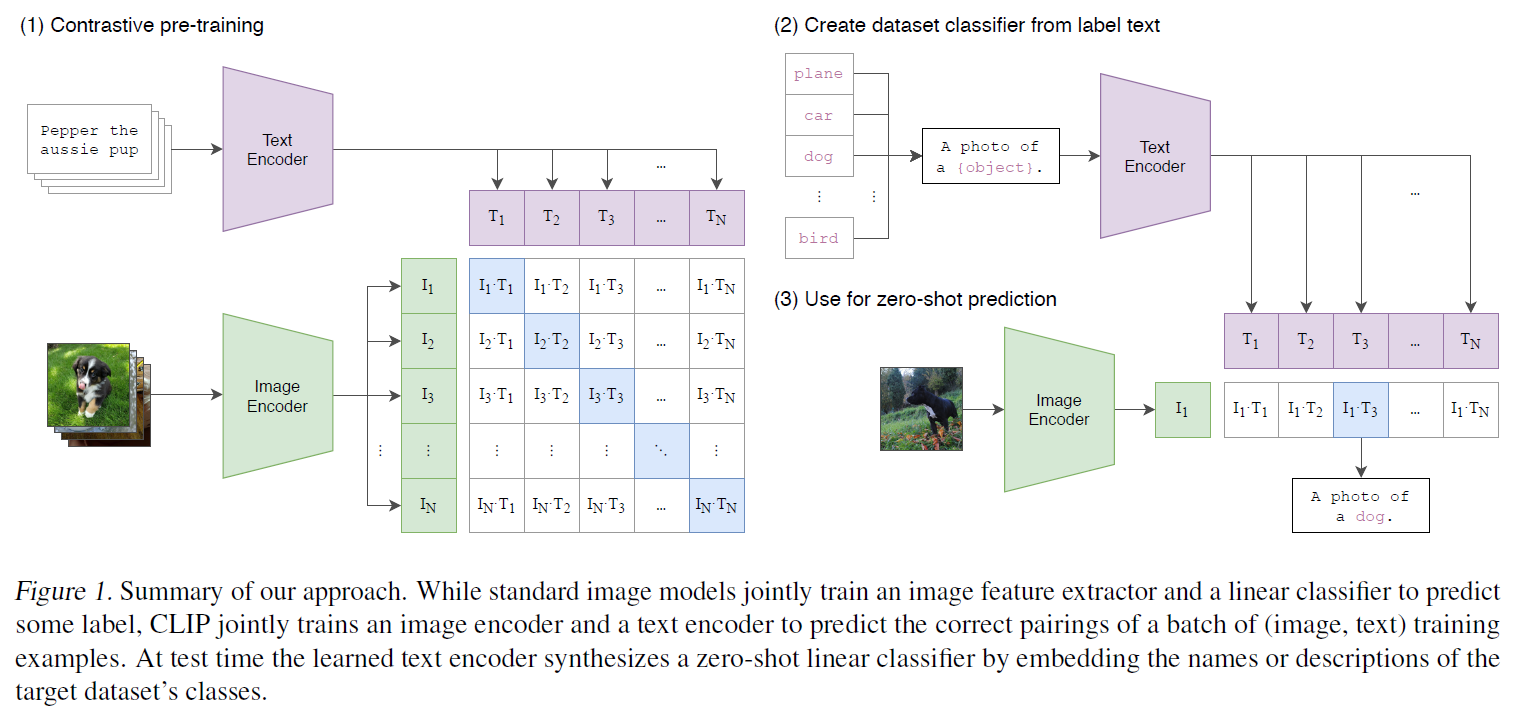

In [12]:
from IPython.display import display
from PIL import Image

image_path = "/summary of clip.png"
image = Image.open(image_path)

display(image)



Belo code cell installs and imports all the required libraries. It loads the CLIP model (ViT-B/32) from OpenAI along with its preprocessing function for images. It also sets the device to GPU if available for faster computation. These libraries will help us encode images and text into a shared embedding space, allowing us to perform zero-shot image-text retrieval using cosine similarity.

In [1]:
# 📌 STEP 1: Install and Import Dependencies
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install torchvision

import os
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm
import requests
from zipfile import ZipFile

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-hfj93n5k
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-hfj93n5k
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 47.2MiB/s]


This below code downloads the Flickr8k image dataset and captions, saves them locally, and extracts them into folders. It checks if the files already exist to avoid re-downloading. The images go into data/images/ and the captions into data/captions/ — ready for use in our CLIP-based retrieval

In [2]:
# 📌 STEP 2: Download and Extract Flickr8k Dataset (Small Subset)
os.makedirs("data", exist_ok=True)

# Image ZIP
img_url = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"
img_path = "data/Flickr8k_Dataset.zip"
if not os.path.exists(img_path):
    r = requests.get(img_url)
    with open(img_path, 'wb') as f:
        f.write(r.content)

# Caption ZIP
cap_url = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip"
cap_path = "data/Flickr8k_text.zip"
if not os.path.exists(cap_path):
    r = requests.get(cap_url)
    with open(cap_path, 'wb') as f:
        f.write(r.content)

# Unzip both
with ZipFile(img_path, 'r') as zip_ref:
    zip_ref.extractall("data/images")

with ZipFile(cap_path, 'r') as zip_ref:
    zip_ref.extractall("data/captions")


This below code in the step 3 reads the caption file and links each caption to its corresponding image.
Only the first 500 entries are loaded for speed. Valid image paths and captions are stored in lists for processing.

and in the step 4 ,each image and its caption are passed through CLIP’s encoders to extract feature vectors.
These features are stored and later used for similarity-based retrieval.
The process is done without gradient tracking for faster inference (torch.no_grad()).

In [3]:
# 📌 STEP 3: Load Image Paths and Captions (Limit for speed)
image_dir = "data/images/Flicker8k_Dataset"
caption_file = "data/captions/Flickr8k.token.txt"

image_paths = []
captions = []

with open(caption_file, 'r') as f:
    for line in f.readlines()[:500]:  # adjust to 1000+ for full set
        img_id, caption = line.strip().split('\t')
        img_file = os.path.join(image_dir, img_id.split('#')[0])
        if os.path.exists(img_file):
            image_paths.append(img_file)
            captions.append(caption)
# 📌 STEP 4: Extract Image and Text Features
image_features = []
text_features = []

print("Extracting CLIP features...")
for i in tqdm(range(len(image_paths))):
    image = preprocess(Image.open(image_paths[i]).convert("RGB")).unsqueeze(0).to(device)
    text = clip.tokenize([captions[i]]).to(device)

    with torch.no_grad():
        img_feat = model.encode_image(image)
        txt_feat = model.encode_text(text)

    image_features.append(img_feat)
    text_features.append(txt_feat)

image_features = torch.cat(image_features, dim=0)
text_features = torch.cat(text_features, dim=0)


Extracting CLIP features...


100%|██████████| 500/500 [03:34<00:00,  2.33it/s]


This below code for step 5, calculates the cosine similarity scores between each caption and all image features.
It retrieves the Top-K most similar images for each caption.
Then it checks whether the correct image is in the Top-1 or Top-5 results, and calculates the accuracy accordingly

In [5]:
# 📌 STEP 5: Top-K Retrieval & Evaluation (Text → Image)
def top_k_retrieval(text_features, image_features, k=5):
    scores = torch.matmul(text_features, image_features.T)
    topk = torch.topk(scores, k, dim=1)
    return topk.indices, topk.values

topk_idx, topk_scores = top_k_retrieval(text_features, image_features, k=5)

# Evaluation: Check if correct image is among Top-1 or Top-5
top1_correct = 0
top5_correct = 0

for i in range(len(image_paths)):
    if i in topk_idx[i][:1]:
        top1_correct += 1
    if i in topk_idx[i]:
        top5_correct += 1

print(f"Top-1 Accuracy: {top1_correct/len(image_paths)*100:.2f}%")
print(f"Top-5 Accuracy: {top5_correct/len(image_paths)*100:.2f}%")


Top-1 Accuracy: 15.60%
Top-5 Accuracy: 81.20%


Function displays the top-K retrieved images for a given caption.
It prints the caption, then shows the most similar images side by side.
Each image is labeled with its rank (1 being the closest match).
This helps visualize how well CLIP retrieves relevant results from text

Query Caption:
👉 A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .



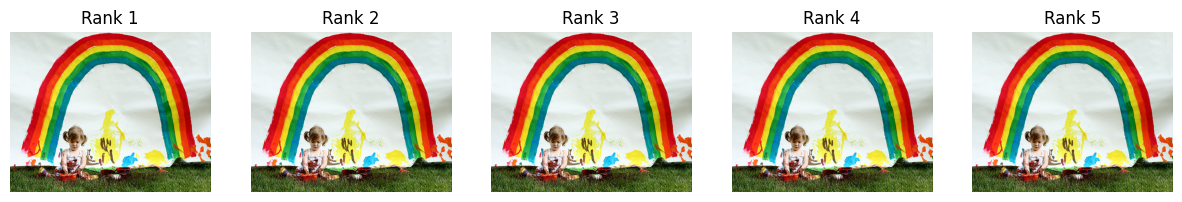

In [6]:
# 📌 STEP 6: Visualize Retrieval Results
def visualize_results(query_idx, top_k=5):
    print(f"Query Caption:\n👉 {captions[query_idx]}\n")

    fig, axs = plt.subplots(1, top_k, figsize=(15, 3))
    for i, idx in enumerate(topk_idx[query_idx][:top_k]):
        img = Image.open(image_paths[idx])
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"Rank {i+1}")
    plt.show()

# Example: Visualize results for caption at index 10
visualize_results(query_idx=10)



**This below code enables to retieve the top five images from user text query**

In the below code *The search_by_captionfunction retrieves the top-k images that best match a given text query using the CLIP model. It first tokenizes the input caption and encodes it into a feature vector. This vector is compared with precomputed image features to calculate similarity scores. The top-k most similar images are then identified and displayed using Matplotlib, with each image labeled by its rank*.

*It even works for different captions as CLIP was trained on hundreds of millions of image-caption pairs. Instead of matching exact labels, it maps both text and images into the same vector space. So when you describe an image—even in different words—CLIP can find images that mean the same thing, not just ones with matching captions.*

Following this, a bar chart is generated to show retrieval accuracy: how often the correct image appears as the top-1 result or within the top-5. This helps evaluate how well the model performs on the given image dataset.


🔍 Your Query: "a man is up in the air"


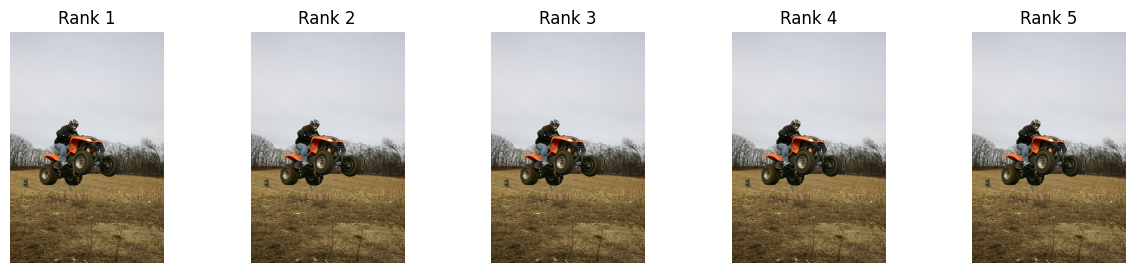

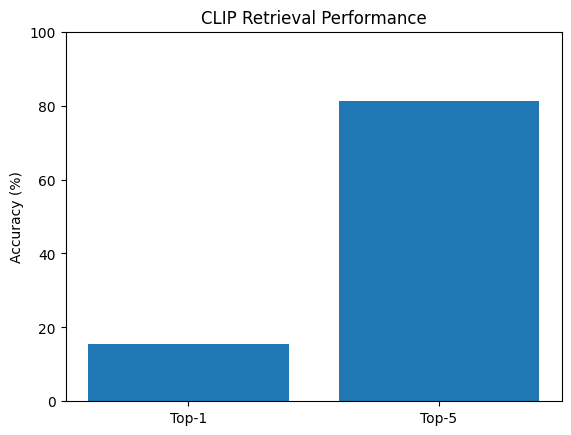

In [11]:
# 📌 Custom Caption Query(text-->image)
def search_by_caption(caption_query, top_k=5):
    print(f"\n🔍 Your Query: \"{caption_query}\"")

    # Encode custom text
    text = clip.tokenize([caption_query]).to(device)
    with torch.no_grad():
        text_feat = model.encode_text(text)

    # Compute similarity with all images
    scores = torch.matmul(text_feat, image_features.T).squeeze(0)
    topk = torch.topk(scores, k=top_k)

    # Display results
    fig, axs = plt.subplots(1, top_k, figsize=(15, 3))
    for i, idx in enumerate(topk.indices):
        img = Image.open(image_paths[idx])
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"Rank {i+1}")
    plt.show()


#################### Try any caption you like##############################

search_by_caption("a man is up in the air") #change captions

import matplotlib.pyplot as plt
#plot accuracy plot between rank 1 vs rank 5 image
plt.bar(["Top-1", "Top-5"], [top1_correct/len(image_paths)*100, top5_correct/len(image_paths)*100])
plt.ylabel("Accuracy (%)")
plt.title("CLIP Retrieval Performance")
plt.ylim(0, 100)
plt.show()






**Retrieving top 5 captions from image , image index number as input **

This function (retrieve_caption_from_image) retrieves the top-5 most relevant captions for a given image index number as query using the CLIP model. It starts by loading the input image, converting it to RGB, and preprocessing it (e.g., resizing and normalization) so it’s ready for the model. The image is then encoded into a feature vector using CLIP’s image encoder, which represents the image in a high-dimensional space. With the image feature vector in hand, it is compared to precomputed caption features (stored in text_features) using a dot product to calculate the similarity scores between the image and each caption. The function selects the top-k captions with the highest similarity scores. It then displays the input image and prints the top-5
 matching captions, ranked by relevance, to show which descriptions are most semantically similar to the image

Image: data/images/Flicker8k_Dataset/1087168168_70280d024a.jpg


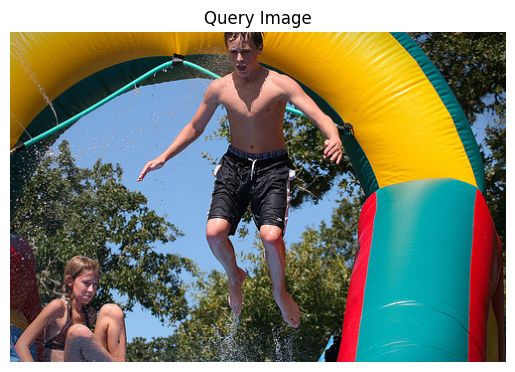


📝 Top Matching Captions:
1. A teenage boy is jumping on an inflatable slide .
2. The man is up in the air .
3. The boy is jumping off a high diving board into the pool .
4. The man is in the pool and throwing a small boy into the air .
5. A boy is jumping on an inflatable ring and a girl is watching him


In [10]:
# 📸 Retrieve Caption from Image (Image → Text)
def retrieve_caption_from_image(image_path, top_k=5):
    image = preprocess(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)

    with torch.no_grad():
        image_feature = model.encode_image(image)

    # Compare with all text features
    similarities = torch.matmul(image_feature, text_features.T).squeeze(0)
    topk = torch.topk(similarities, k=top_k)

    print(f"Image: {image_path}")
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Query Image")
    plt.show()

    print("\n📝 Top Matching Captions:")
    for i, idx in enumerate(topk.indices):
        print(f"{i+1}. {captions[idx]}")

################## 👇 Example: Test on any image from dataset##############
retrieve_caption_from_image(image_paths[337])  # change index for different images
